In [3]:
import numpy as np
import matplotlib.pyplot as plt
import gym

In [1]:
class GridEnv:
    def __init__(self, grid, init, B):
        """
        grid is a D-dimensional array, 1 for walkable, 0 for non-walkable. It is assumed to have borders of 0s
        B is the number of parallel trajectories to simulate
        
        a pos is BxD array
        an action is an integer, index in the directions array
        """
        self.grid = grid
        self.size = np.array(self.grid.shape)
        self.init = init
        self.D = len(self.grid.shape)
        self.B = B
        self.pos = np.repeat(self.init[None,:], self.B, axis=0) # BxD
        self.dirs = np.zeros((2*self.D, self.D)) # AxD
        actions = np.arange(2*self.D)
        self.dirs[actions, actions//2] = 2*(actions % 2) - 1
    
    def step(a):
        """
        a is B array of actions
        returns observation of new state, reward, done, debug
        """
        new_pos = self.pos + self.dirs[a]
        # walkable[b] = grid[new_pos[b][0], new_pos[b][1], ...]
        walkable = grid[tuple(new_pos.T)]
        self.pos[walkable] = new_pos[walkable]
        return self.pos, walkable.astype(float) - 1, np.zeros(self.B, dtype=bool), None
    
    def render():
        if self.D != 2:
            raise ValueError('Impossible to render non-2D ')
        figure()
        image = self.grid
        plt.imshow(image)
        plt.scatter(*self.pos.T, marker='x')
        plt.show()
    
env = GridEnv(np.empty((10, 20, 5)), np.array([0, 0, 0]), 10)

NameError: name 'np' is not defined

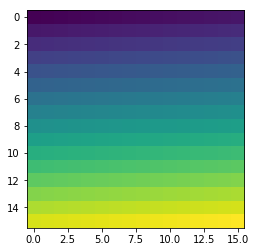

In [6]:
plt.figure()
image = np.arange(16 ** 2).reshape(16, 16)
plt.imshow(image)
# plt.scatter(*self.pos.T, marker='x')
plt.show()

In [30]:
np.where(np.arange(5) == 1)[0]

array([1], dtype=int64)